# (1) Elon Musk Tweets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import spacy 
import re

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
tweets = pd.read_csv("D:\Assignment\Text Mining\Elon_musk.csv",encoding='Latin-1')

In [3]:
tweets.head()

Unnamed: 0                                               Text
0           1                             @kunalb11 Im an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...

In [4]:
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

### Text Preprocessing

In [5]:
# removes any leading (spaces at the beginning) and trailing (spaces at the end) characters (space is the default leading character to remove)

tweets = [Text.strip() for Text in tweets.Text]
tweets = [Text for Text in tweets if Text]  # removes empty strings, because they are considered in Python as False
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [6]:
# Joining the list into one string/text

tweets_text=' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [7]:
# Remove Twitter username (Removes @usernames)

tokens = TweetTokenizer(strip_handles=True)
tweets_tokens = tokens.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [8]:
# Again Joining the list into one string/text

tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [9]:
# Remove Punctuations

no_punc_text = re.sub(r'[^\w\s]', '', tweets_tokens_text)
no_punc_text

'I  m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It  s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won  t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway togeth

In [10]:
# remove https or url within text

no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I  m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It  s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won  t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reasonably well  S

In [11]:
# Word Tokenize

text_tokens = word_tokenize(no_url_text)
print(text_tokens)

['I', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing', 'Please', 'unlo

In [12]:
# Tokens count
len(text_tokens)

17467

In [13]:
my_stop_words = stopwords.words('english')

sw_list = ['\x92', 'rt', 'ye', 'yeah', 'haha', 'Yes', 'I']
my_stop_words.extend(sw_list)

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'U0001F923', 'U0001F923', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once

In [14]:
# Normalize the data

lower_words=[Text.lower() for Text in no_stop_tokens]

In [15]:
# Lemmatization

nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))
print(doc)

alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account u0001f923 u0001f923 this true power any crypto wallet give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g it meant price countries only difference taxes shipping 

In [16]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'u0001f923', 'u0001f923', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flow',

In [17]:
clean_tweets=' '.join(lemmas)
clean_tweets

'alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account u0001f923 u0001f923 this true power any crypto wallet give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g it mean price country only difference taxis ship this intend earth may idea apply mar u000

### Feature Extaction

#### Using CountVectorizer

In [18]:
cv = CountVectorizer()
tweetscv = cv.fit_transform(lemmas)

In [19]:
print(cv.vocabulary_)

{'alien': 194, 'ray': 2346, 'trace': 3011, 'cyberpunk': 766, 'hdr': 1357, 'nextlevel': 1959, 'have': 1352, 'try': 3042, 'great': 1304, 'interview': 1555, 'doge': 889, 'underestimate': 3176, 'congratulation': 674, 'tesla': 2916, 'china': 583, 'amazing': 217, 'execution': 1056, 'last': 1639, 'year': 3392, 'now': 1987, 'next': 1958, 'even': 1030, 'happy': 1339, 'new': 1956, 'ox': 2088, 'frodo': 1206, 'underdoge': 3175, 'all': 197, 'thought': 2953, 'would': 3378, 'fail': 1090, 'himself': 1401, 'haha': 1327, 'thank': 2927, 'indeed': 1496, 'tweet': 3057, 'definitely': 803, 'represent': 2413, 'realworld': 2361, 'time': 2969, 'allocation': 199, 'the': 2932, 'entertaining': 1000, 'outcome': 2067, 'likely': 1694, 'just': 1597, 'send': 2556, 'agree': 179, 'clubhouse': 612, 'it': 1574, 'get': 1265, 'real': 2356, 'buy': 502, 'dogecoin': 891, 'lil': 1695, 'toddler': 2981, 'hodler': 1407, 'he': 1358, 'issue': 1573, 'sentencing': 2561, 'seem': 2548, 'bit': 418, 'high': 1392, 'fix': 1151, 'please': 218

In [20]:
print(cv.get_feature_names())

['000', '005', '10', '100', '1000', '10000', '107', '10x', '11', '12', '122', '13', '130', '14', '140', '149', '15', '150', '155', '16', '162', '17', '18', '1880s', '1b', '1st', '20', '200', '2007', '2008', '2009', '2012', '2017', '2020', '2021', '2024', '2026', '2030', '20k', '210', '218', '21st', '22', '225', '23', '230', '24', '240', '25', '250', '250kw', '25gunsteslacom', '25k', '25th', '28', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445', '448', '4530', '4680', '479000', '48', '4d', '4th', '50', '50000', '50k', '60', '60000', '65', '69420', '6f', '6k', '727', '74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 

In [21]:
print(tweetscv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
print(tweetscv.toarray().shape)

(11485, 3412)


#### CountVectorizer with N-grams (Bigrams & Trigrams)

In [23]:
cv_ngram_range = CountVectorizer(analyzer='word',
                                 ngram_range=(1, 3),
                                 max_features=100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [24]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'also', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'land', 'launch', 'life', 'like', 'look', 'lot', 'love', 'make', 'many', 'mar', 'maybe', 'mission', 'model', 'month', 'much', 'need', 'new', 'next', 'no', 'not', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 'right', 'rocket', 'rt', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'still', 'super', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'u0001f923', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF Vectorizer

In [25]:
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [26]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '13', '20', '2020', '30', '40', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'and', 'another', 'appear', 'apply', 'appreciate', 'approval', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'catch', 'cell', 'ch4', 'chance', 'change', 'china', 'civilization', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cybertruck', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'difference', 'different', 'do', 'dock', 'doge', 'dojo', '

#### Generate Word Cloud

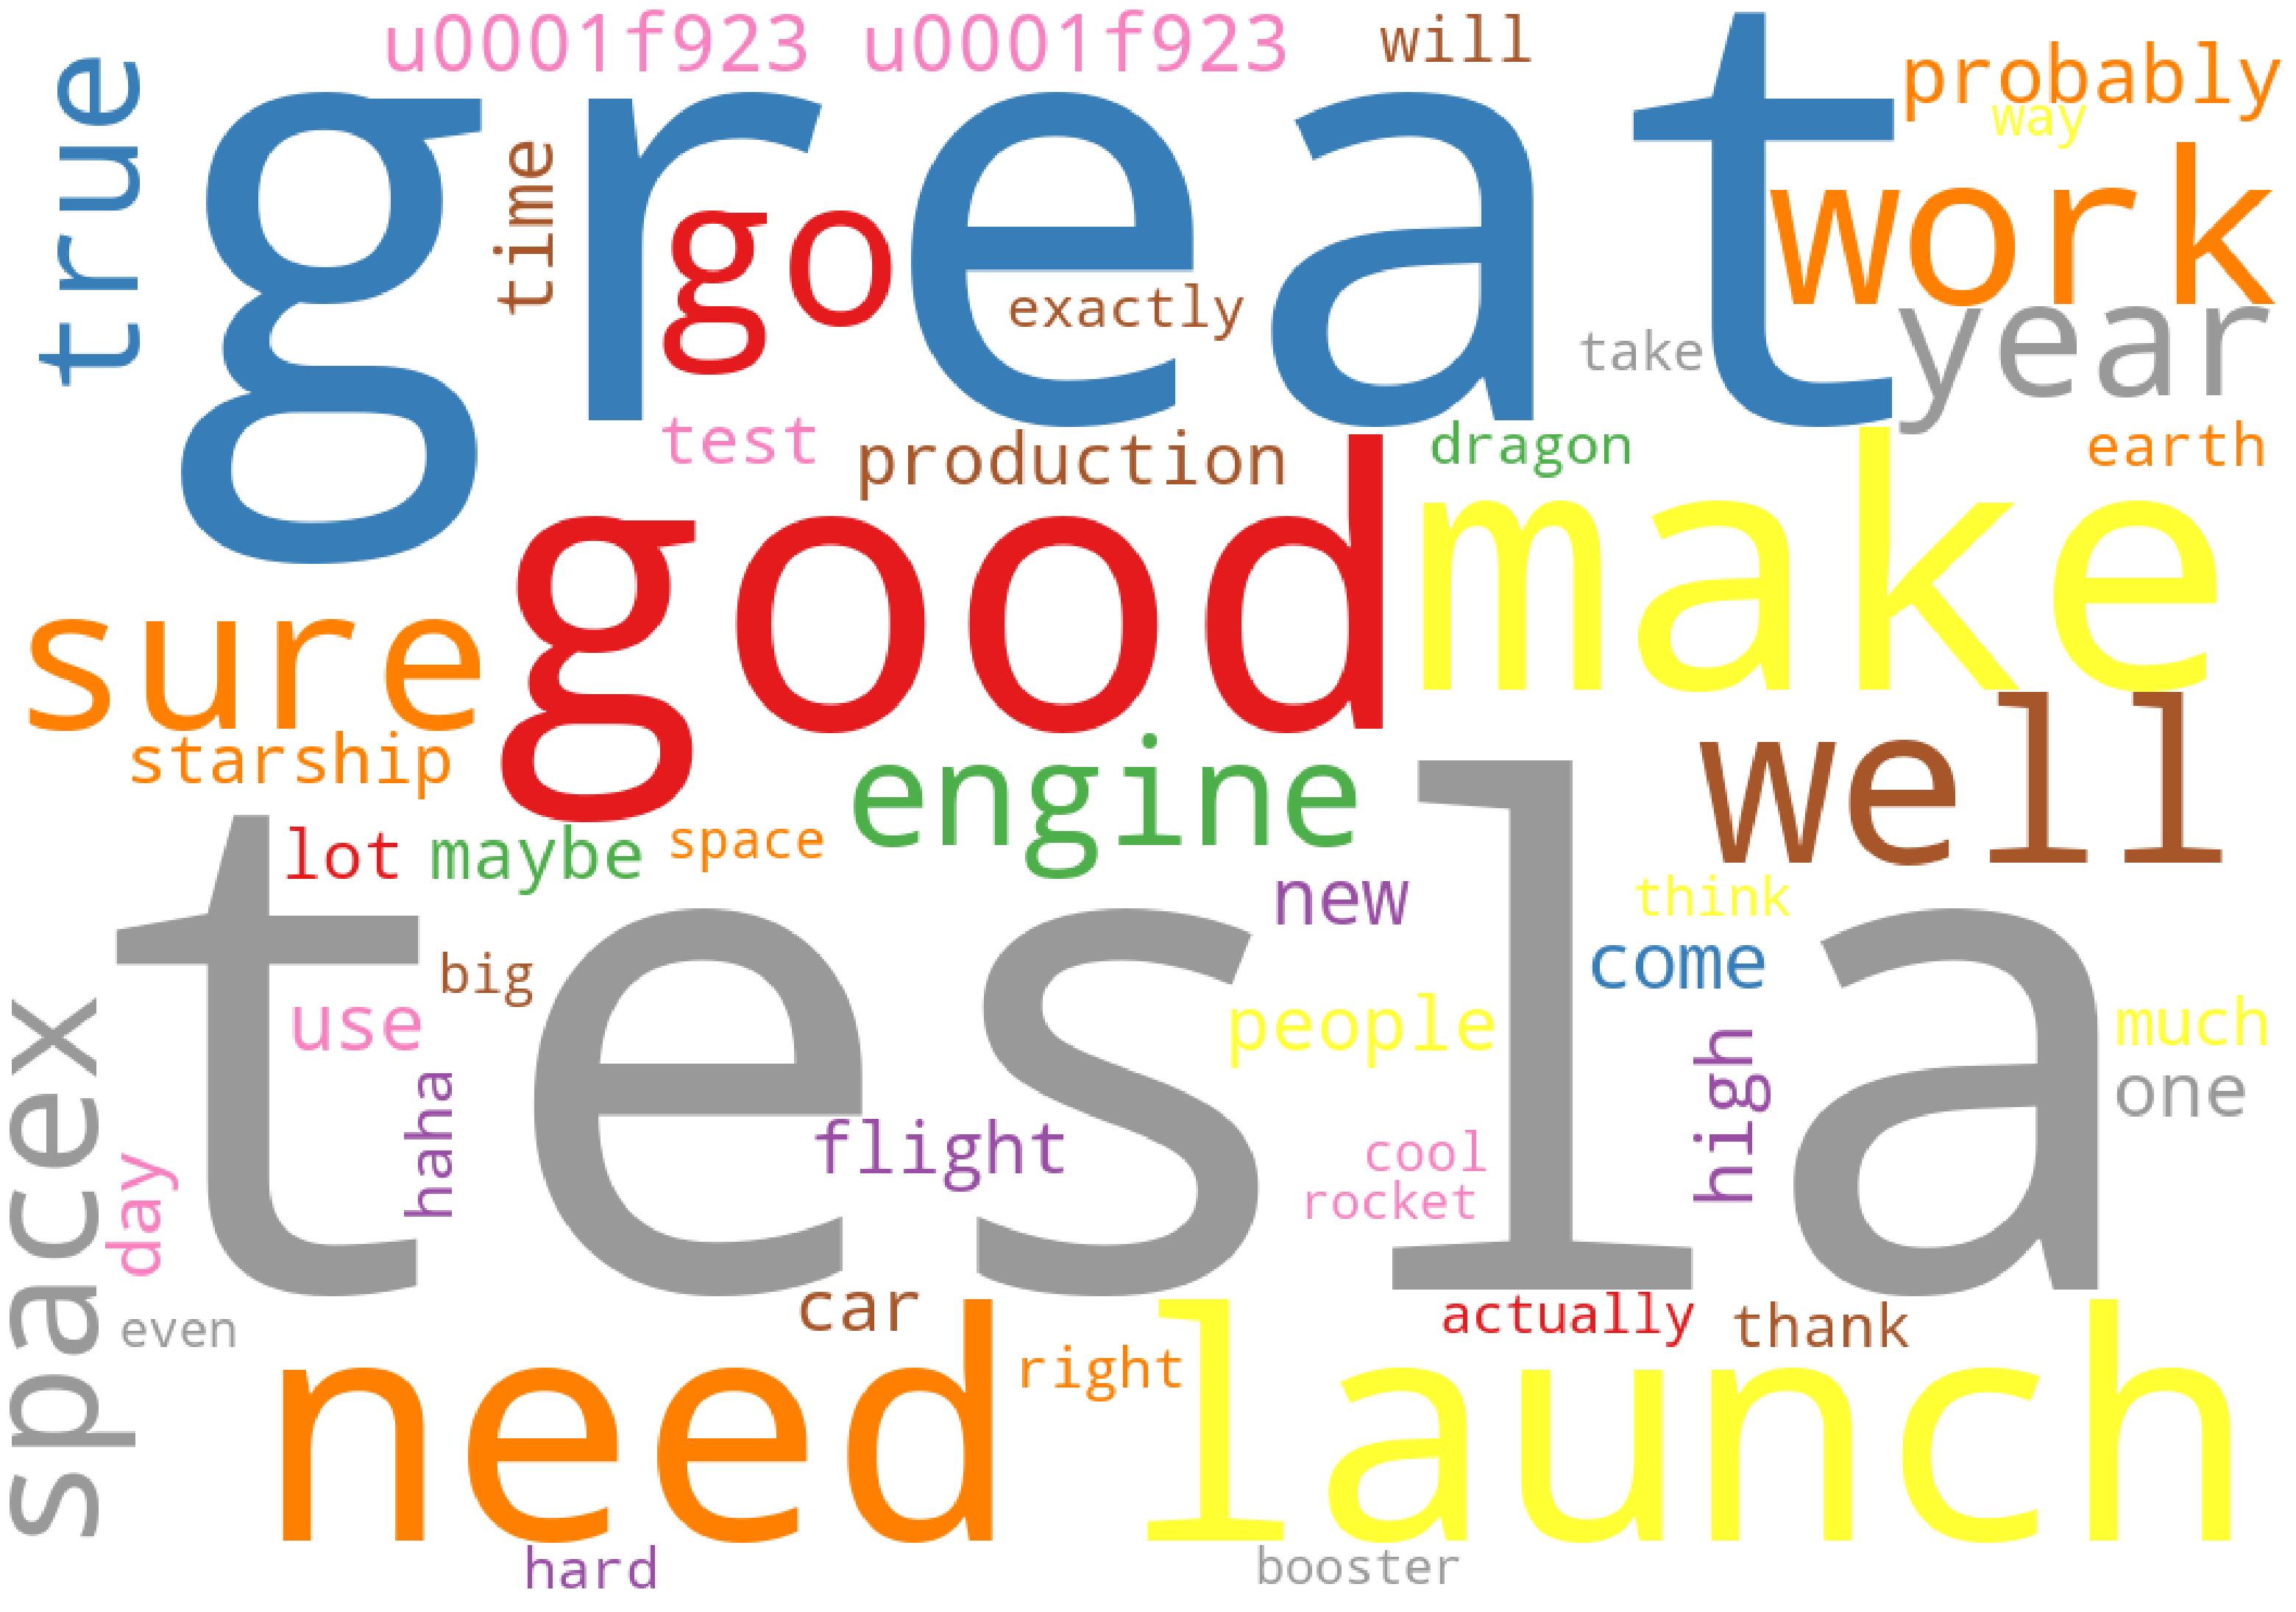

In [27]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis('off')


# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud = WordCloud(width=1000,
                      height=700,
                      background_color='white',
                      max_words=50,
                      colormap='Set1',
                      stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

### Named Entity Recognition (NER)

In [28]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [29]:
for token in doc_block[100:200]:
    print(token,token.pos_)   

one NUM
mission NOUN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
ipo PROPN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex VERB
need AUX
pass VERB
deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g ADP
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mar PROPN
u0001f923 PROPN
u0001f923 PROPN
xprize NOUN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that PRON
miss VERB
back ADP
work NOUN
go VERB
do AUX
seem VERB
bit NOUN
high ADJ
doge PROPN
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin PROPN
per ADP


In [30]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['unit', 'time', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'video', 'people', 'speak', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'rainforest', 'come', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'mission', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'flameout', 'risk', 'start', 'engine', 'shut', 'need']


In [31]:
# Counting the noun & verb tokens
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0   tesla     76
1    make     64
2  launch     62
3    year     49
4    work     49
5    need     48
6      go     44
7    come     42
8     day     38
9     get     37

<AxesSubplot: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

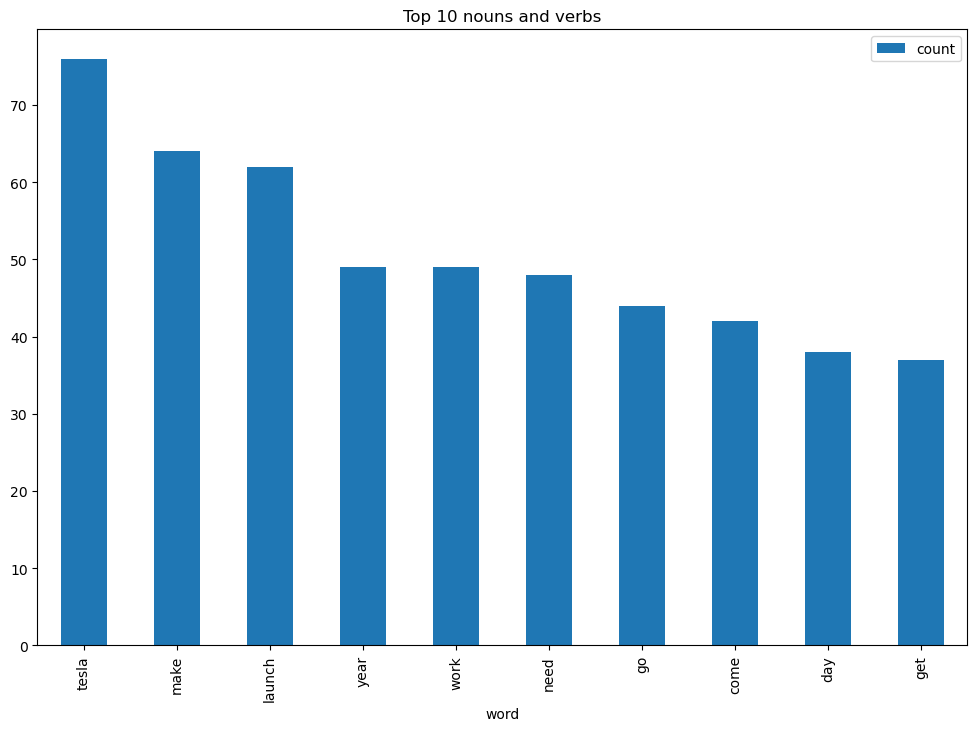

In [32]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

### Emotion Mining - Sentiment Analysis

In [33]:
sentences=nltk.tokenize.sent_tokenize(' '.join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [34]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
919  @kenyanwalstreet Not actually a payout, just a...
920  It may never pay out, as the stock cant b
 ht...
921                                    Details Aug 28.
922  AI symbiosis while u wait @vistacruiser7 @flcn...
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[924 rows x 1 columns]

In [35]:
# Emotion Lexicon - Affin
# Source of this dataset
# https://github.com/rudeboybert/fivethirtyeight/blob/master/inst/extdata/afinn.csv

affin = pd.read_csv(r"D:\Assignment\Text Mining\afinn.csv")
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [36]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [37]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores


def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [38]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [39]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [40]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
647  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
837  Cool Model 3 review by @iamjamiefoxx https://t...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
680  Occasional flights from land are ok, but frequ...               -4   
611  Then static fire, checkouts, static fire, fly ...               -4   
..                                                 ...              ...   
645  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
585  The open areas
 https://t.co/rabjKrtQlw @Sav...               16   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   
719  We just havent observed the
 https://t.co/mez...               17   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               18   

     word_count  
647          60  
837          61  
64           11  
680          39  
611          12  
..          ...  
645          65  
585         138  
105          94  
719          72  
36          231  

[924 rows x 3 columns]

In [41]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.419913
std        2.760398
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       18.000000
Name: sentiment_value, dtype: float64

In [42]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
4                   Now on to the next for even more!!                0   
5                            Happy New Year of the Ox!                0   
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
4             8  
5             6  
6            14  
..          ...  
919          11  
920          31  
921           3  
922          47  
923          15  

[483 rows x 3 columns]

In [43]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
7    https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...                2   
9    The most entertaining outcome is the most like...                5   
17   Back to work I go @CapybaraSurfer @MattWallace...                4   
..                                                 ...              ...   
911                       He was one of the very best.                3   
913  @Ali_Afshari In general, we need to improve ho...                6   
915  @burakaydik True Wow, IHOP &amp; GitHub are cl...                3   
917               This is both great &amp; terrifying.                3   
918  Everything weve ever sensed or thought has be...                2   

     word_count  
2             4  
3            13  
7            10  
9           109  
17           38  
..          ...  
911           7  
913          87  
915          15  
917           6  
918          17  

[441 rows x 3 columns]

In [44]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
919  @kenyanwalstreet Not actually a payout, just a...                0   
920  It may never pay out, as the stock cant b
 ht...               -4   
921                                    Details Aug 28.                0   
922  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
923  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
919          11    919  
920          31    920  
921           3    921  
922          47    922  
923          15    923  

[924 rows x 4 columns]

<AxesSubplot: xlabel='sentiment_value', ylabel='Density'>

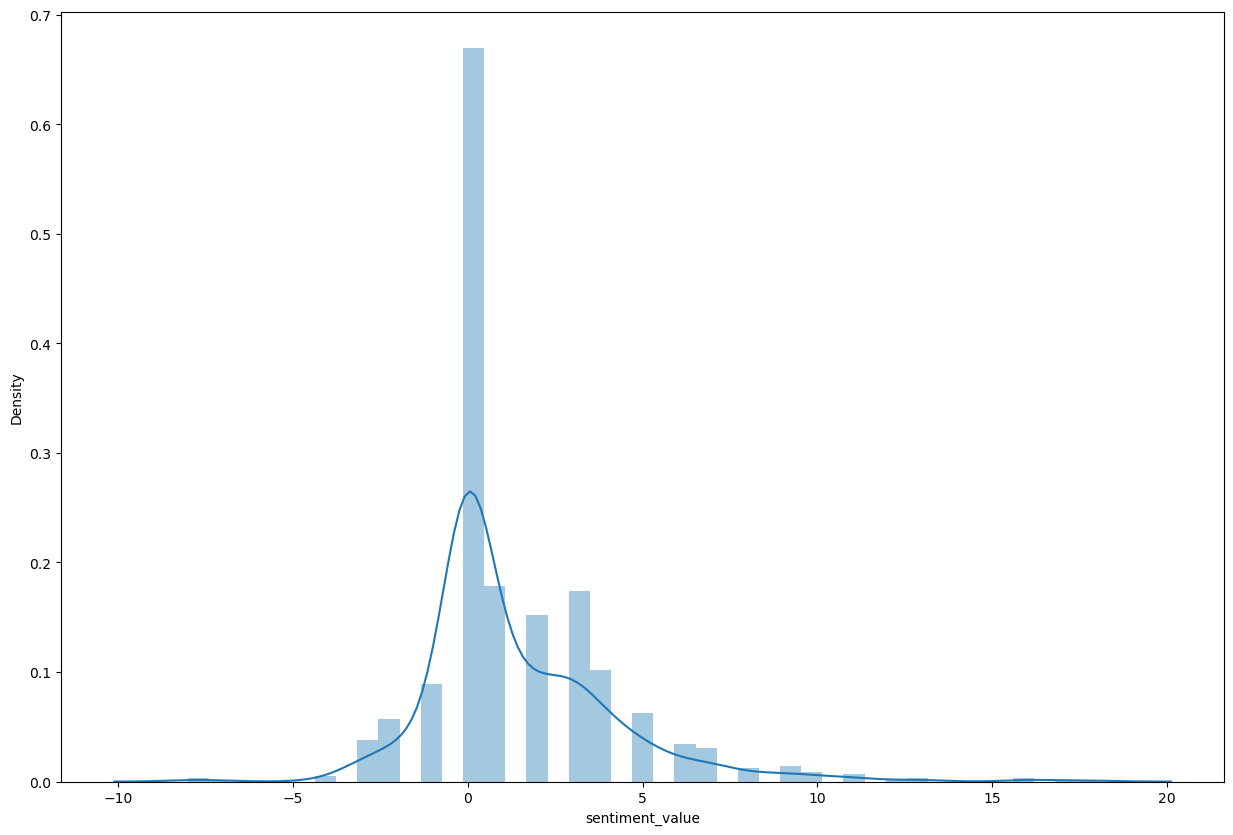

In [45]:
# Plotting the sentiment value for whole review
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot: xlabel='index', ylabel='sentiment_value'>

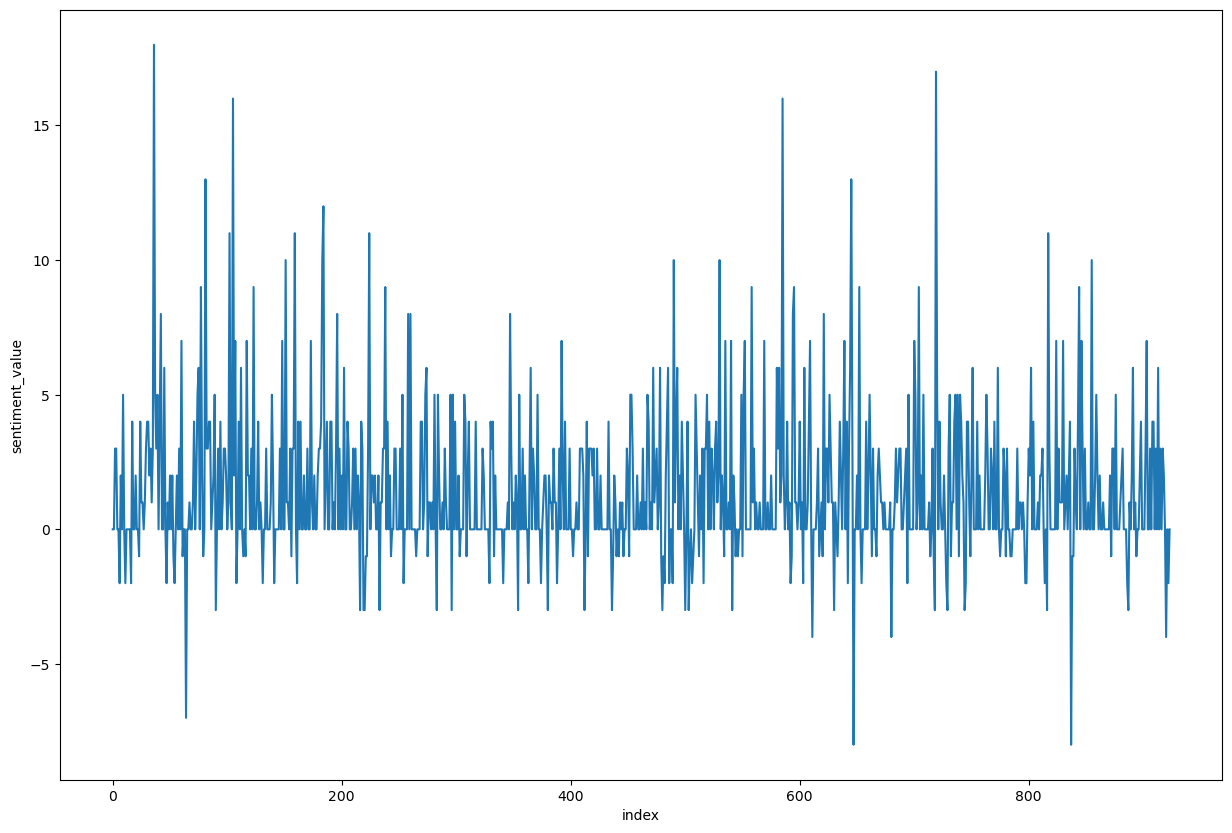

In [46]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

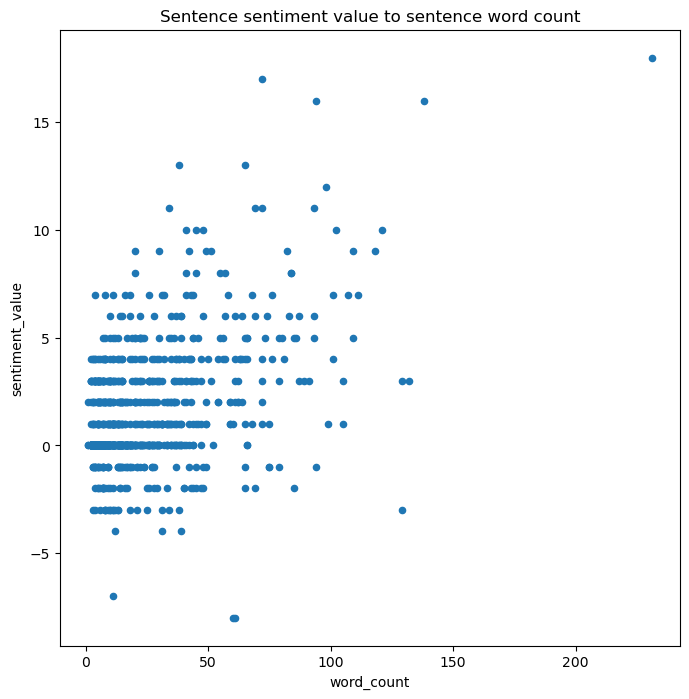

In [47]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

---------------------------------------------------------------------------------------------------------------------------

# (2) Amazon Product Review

## Samsung Galaxy Z Flip 4 - Customer Review 

**Source :-** https://www.amazon.in/Samsung-Graphite-Storage-Additional-Exchange/product-reviews/B0B8SP358P/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews

In [48]:
reviews = pd.read_csv("D:\Assignment\Text Mining\Samsung_Galaxy_Z_Flip_5G.csv")

In [49]:
reviews

stars                                            comment
0     4.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Nice product could...
1     5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Update1. Many  peo...
2     4.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Value for money..L...
3     4.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Less battery, no d...
4     5.0 out of 5 stars                                                NaN
...                  ...                                                ...
1195  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    What I think the m...
1196  4.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    My first flip phon...
1197  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    The durability and...
1198  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Excellent phone. W...
1199  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Loved this phone ,...

[1200 rows x 2 columns]

In [50]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stars    1200 non-null   object
 1   comment  1080 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [51]:
reviews.isna().sum()

stars        0
comment    120
dtype: int64

In [52]:
reviews.dropna(inplace=True)

In [53]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stars    1080 non-null   object
 1   comment  1080 non-null   object
dtypes: object(2)
memory usage: 25.3+ KB


### Text Preprocessing

In [54]:
reviews=[comment.strip() for comment in reviews.comment]
reviews=[comment for comment in reviews if comment]
reviews[0:10]

['Nice product could have been better if quality of camera was better',
 "Update1. Many  people has claimed including my friend that even if screen stop working due to Samsung fault, they will not provide warranty even though minor scratches on screen Samsung service centre count as void of warranty and you have to pay additional 30k for screen replacement. I think Samsung should provide 2 year warranty on foldable phone screen otherwise it is very risky within 1 year if phone stop working due to manufacturing defect or the way foldable phone design you will have to bear the cost even though you have paid 1 lakh rupees. Keep in mind  by the way 1 month passed i have no any issues but people say problem occurred after 6 months.Initial reviewI'm thrilled with experience especially the cover display. Download cover screen os app and enjoy YouTube, chrome and more on cover screen which samsung by default not provide. Phone is better than iPhone to flaunt.Update10 days passed no issues happ

In [55]:
reviews_text=' '.join(reviews)
reviews_text

"Nice product could have been better if quality of camera was better Update1. Many  people has claimed including my friend that even if screen stop working due to Samsung fault, they will not provide warranty even though minor scratches on screen Samsung service centre count as void of warranty and you have to pay additional 30k for screen replacement. I think Samsung should provide 2 year warranty on foldable phone screen otherwise it is very risky within 1 year if phone stop working due to manufacturing defect or the way foldable phone design you will have to bear the cost even though you have paid 1 lakh rupees. Keep in mind  by the way 1 month passed i have no any issues but people say problem occurred after 6 months.Initial reviewI'm thrilled with experience especially the cover display. Download cover screen os app and enjoy YouTube, chrome and more on cover screen which samsung by default not provide. Phone is better than iPhone to flaunt.Update10 days passed no issues happy wit

In [56]:
no_punc_text = re.sub(r'[^\w\s]', '', reviews_text)
no_punc_text

'Nice product could have been better if quality of camera was better Update1 Many  people has claimed including my friend that even if screen stop working due to Samsung fault they will not provide warranty even though minor scratches on screen Samsung service centre count as void of warranty and you have to pay additional 30k for screen replacement I think Samsung should provide 2 year warranty on foldable phone screen otherwise it is very risky within 1 year if phone stop working due to manufacturing defect or the way foldable phone design you will have to bear the cost even though you have paid 1 lakh rupees Keep in mind  by the way 1 month passed i have no any issues but people say problem occurred after 6 monthsInitial reviewIm thrilled with experience especially the cover display Download cover screen os app and enjoy YouTube chrome and more on cover screen which samsung by default not provide Phone is better than iPhone to flauntUpdate10 days passed no issues happy with phone Sa

In [57]:
text_tokens = word_tokenize(no_punc_text)
print(text_tokens)

['Nice', 'product', 'could', 'have', 'been', 'better', 'if', 'quality', 'of', 'camera', 'was', 'better', 'Update1', 'Many', 'people', 'has', 'claimed', 'including', 'my', 'friend', 'that', 'even', 'if', 'screen', 'stop', 'working', 'due', 'to', 'Samsung', 'fault', 'they', 'will', 'not', 'provide', 'warranty', 'even', 'though', 'minor', 'scratches', 'on', 'screen', 'Samsung', 'service', 'centre', 'count', 'as', 'void', 'of', 'warranty', 'and', 'you', 'have', 'to', 'pay', 'additional', '30k', 'for', 'screen', 'replacement', 'I', 'think', 'Samsung', 'should', 'provide', '2', 'year', 'warranty', 'on', 'foldable', 'phone', 'screen', 'otherwise', 'it', 'is', 'very', 'risky', 'within', '1', 'year', 'if', 'phone', 'stop', 'working', 'due', 'to', 'manufacturing', 'defect', 'or', 'the', 'way', 'foldable', 'phone', 'design', 'you', 'will', 'have', 'to', 'bear', 'the', 'cost', 'even', 'though', 'you', 'have', 'paid', '1', 'lakh', 'rupees', 'Keep', 'in', 'mind', 'by', 'the', 'way', '1', 'month', 'p

In [58]:
len(text_tokens)

70920

In [59]:
my_stop_words = stopwords.words('english')

sw_list = ['I', 'The', 'It', 'A', 'Samsung']
my_stop_words.extend(sw_list)

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Nice', 'product', 'could', 'better', 'quality', 'camera', 'better', 'Update1', 'Many', 'people', 'claimed', 'including', 'friend', 'even', 'screen', 'stop', 'working', 'due', 'fault', 'provide', 'warranty', 'even', 'though', 'minor', 'scratches', 'screen', 'service', 'centre', 'count', 'void', 'warranty', 'pay', 'additional', '30k', 'screen', 'replacement', 'think', 'provide', '2', 'year', 'warranty', 'foldable', 'phone', 'screen', 'otherwise', 'risky', 'within', '1', 'year', 'phone', 'stop', 'working', 'due', 'manufacturing', 'defect', 'way', 'foldable', 'phone', 'design', 'bear', 'cost', 'even', 'though', 'paid', '1', 'lakh', 'rupees', 'Keep', 'mind', 'way', '1', 'month', 'passed', 'issues', 'people', 'say', 'problem', 'occurred', '6', 'monthsInitial', 'reviewIm', 'thrilled', 'experience', 'especially', 'cover', 'display', 'Download', 'cover', 'screen', 'os', 'app', 'enjoy', 'YouTube', 'chrome', 'cover', 'screen', 'samsung', 'default', 'provide', 'Phone', 'better', 'iPhone', 'flaun

In [60]:
lower_words=[Text.lower() for Text in no_stop_tokens]

In [61]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))
print(doc)

nice product could better quality camera better update1 many people claimed including friend even screen stop working due fault provide warranty even though minor scratches screen service centre count void warranty pay additional 30k screen replacement think provide 2 year warranty foldable phone screen otherwise risky within 1 year phone stop working due manufacturing defect way foldable phone design bear cost even though paid 1 lakh rupees keep mind way 1 month passed issues people say problem occurred 6 monthsinitial reviewim thrilled experience especially cover display download cover screen os app enjoy youtube chrome cover screen samsung default provide phone better iphone flauntupdate10 days passed issues happy phone provide atleast free case phone going buy apple using 5 year phone but fall love due flip also apple useful edit videos download extensive app get moded version customisation android perfect this phone need charged twice day set phone charging capicuty 85 percentage 

In [62]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['nice', 'product', 'could', 'better', 'quality', 'camera', 'well', 'update1', 'many', 'people', 'claim', 'include', 'friend', 'even', 'screen', 'stop', 'work', 'due', 'fault', 'provide', 'warranty', 'even', 'though', 'minor', 'scratch', 'screen', 'service', 'centre', 'count', 'void', 'warranty', 'pay', 'additional', '30k', 'screen', 'replacement', 'think', 'provide', '2', 'year', 'warranty', 'foldable', 'phone', 'screen', 'otherwise', 'risky', 'within', '1', 'year', 'phone', 'stop', 'work', 'due', 'manufacturing', 'defect', 'way', 'foldable', 'phone', 'design', 'bear', 'cost', 'even', 'though', 'pay', '1', 'lakh', 'rupee', 'keep', 'mind', 'way', '1', 'month', 'pass', 'issue', 'people', 'say', 'problem', 'occur', '6', 'monthsinitial', 'reviewim', 'thrilled', 'experience', 'especially', 'cover', 'display', 'download', 'cover', 'screen', 'os', 'app', 'enjoy', 'youtube', 'chrome', 'cover', 'screen', 'samsung', 'default', 'provide', 'phone', 'well', 'iphone', 'flauntupdate10', 'day', 'pass

In [63]:
clean_reviews=' '.join(lemmas)
clean_reviews

'nice product could better quality camera well update1 many people claim include friend even screen stop work due fault provide warranty even though minor scratch screen service centre count void warranty pay additional 30k screen replacement think provide 2 year warranty foldable phone screen otherwise risky within 1 year phone stop work due manufacturing defect way foldable phone design bear cost even though pay 1 lakh rupee keep mind way 1 month pass issue people say problem occur 6 monthsinitial reviewim thrilled experience especially cover display download cover screen os app enjoy youtube chrome cover screen samsung default provide phone well iphone flauntupdate10 day pass issue happy phone provide atleast free case phone going buy apple use 5 year phone but fall love due flip also apple useful edit video download extensive app get mode version customisation android perfect this phone need charge twice day set phone charging capicuty 85 percentage normal use last full 12 hr issue

### Feature Extaction

#### Using CountVectorizer

In [64]:
cv = CountVectorizer()
reviewscv = cv.fit_transform(lemmas)

In [65]:
print(cv.vocabulary_)

{'nice': 139, 'product': 161, 'could': 44, 'better': 25, 'quality': 166, 'camera': 29, 'well': 212, 'update1': 199, 'many': 122, 'people': 151, 'claim': 38, 'include': 105, 'friend': 89, 'even': 71, 'screen': 177, 'stop': 186, 'work': 218, 'due': 63, 'fault': 78, 'provide': 165, 'warranty': 210, 'though': 194, 'minor': 125, 'scratch': 176, 'service': 180, 'centre': 32, 'count': 45, 'void': 209, 'pay': 150, 'additional': 10, '30k': 4, 'replacement': 169, 'think': 192, 'year': 221, 'foldable': 87, 'phone': 155, 'otherwise': 147, 'risky': 171, 'within': 217, 'manufacturing': 121, 'defect': 53, 'way': 211, 'design': 56, 'bear': 23, 'cost': 43, 'lakh': 111, 'rupee': 172, 'keep': 109, 'mind': 124, 'month': 129, 'pass': 149, 'issue': 107, 'say': 175, 'problem': 160, 'occur': 143, 'monthsinitial': 131, 'reviewim': 170, 'thrilled': 195, 'experience': 74, 'especially': 70, 'cover': 46, 'display': 58, 'download': 61, 'os': 146, 'app': 15, 'enjoy': 68, 'youtube': 222, 'chrome': 37, 'samsung': 173,

In [66]:
print(cv.get_feature_names())

['10', '12', '13', '2530', '30k', '50', '70', '85', 'accessory', 'add', 'additional', 'also', 'amazed', 'amazing', 'android', 'app', 'apple', 'approx', 'atleast', 'attention', 'awesome', 'awsmbattery', 'battery', 'bear', 'beautiful', 'better', 'but', 'buy', 'by', 'camera', 'capicuty', 'case', 'centre', 'change', 'charge', 'charger', 'charging', 'chrome', 'claim', 'close', 'come', 'compare', 'cone', 'cost', 'could', 'count', 'cover', 'crease', 'customisation', 'daily', 'day', 'dayupdate', 'default', 'defect', 'definite', 'delicate', 'design', 'device', 'display', 'do', 'dope', 'download', 'dslr', 'due', 'durability', 'dust', 'edit', 'end', 'enjoy', 'esim', 'especially', 'even', 'everyday', 'excellent', 'experience', 'extensive', 'fall', 'far', 'fault', 'feature', 'feel', 'female', 'find', 'first', 'flauntupdate10', 'flip', 'fold', 'foldable', 'free', 'friend', 'front', 'full', 'get', 'give', 'going', 'good', 'goodcamera', 'graber', 'great', 'happen', 'happy', 'heavy', 'hour', 'how', 'hr

In [67]:
print(reviewscv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [68]:
print(reviewscv.toarray().shape)

(42360, 223)


#### CountVectorizer with N-grams (Bigrams & Trigrams)

In [69]:
cv_ngram_range = CountVectorizer(analyzer='word',
                                 ngram_range=(1, 3),
                                 max_features=100)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [70]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['10', '50', 'amazing', 'app', 'apple', 'awesome', 'battery', 'beautiful', 'but', 'camera', 'cover', 'crease', 'day', 'device', 'display', 'download', 'due', 'enjoy', 'even', 'experience', 'feature', 'feel', 'flip', 'fold', 'foldable', 'get', 'give', 'good', 'iphone', 'issue', 'like', 'love', 'minor', 'month', 'monthscrease', 'monthsinitial', 'monthsno', 'monthsupdate', 'must', 'my', 'need', 'new', 'next', 'nice', 'normal', 'not', 'nothing', 'occur', 'one', 'open', 'os', 'otherwise', 'overall', 'pass', 'pay', 'people', 'percentage', 'perfect', 'performance', 'phone', 'portable', 'product', 'provide', 'quality', 'reviewim', 'risky', 'rupee', 'samsung', 'samsungif', 'say', 'scratch', 'screen', 'seem', 'slick', 'stop', 'take', 'target', 'think', 'this', 'though', 'time', 'use', 'usual', 'value', 'version', 'very', 'video', 'void', 'warranty', 'way', 'well', 'whar', 'what', 'wife', 'will', 'within', 'work', 'worth', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


In [71]:
bow_matrix_ngram.shape

(42360, 100)

#### TF-IDF Vectorizer

In [72]:
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [73]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '12', '13', '2530', '30k', '50', '70', '85', 'accessory', 'add', 'additional', 'also', 'amazed', 'amazing', 'android', 'app', 'apple', 'approx', 'atleast', 'attention', 'awesome', 'awsmbattery', 'battery', 'bear', 'beautiful', 'better', 'but', 'buy', 'by', 'camera', 'capicuty', 'case', 'centre', 'change', 'charge', 'charger', 'charging', 'chrome', 'claim', 'close', 'come', 'compare', 'cone', 'cost', 'could', 'count', 'cover', 'crease', 'customisation', 'daily', 'day', 'dayupdate', 'default', 'defect', 'definite', 'delicate', 'design', 'device', 'display', 'do', 'dope', 'download', 'dslr', 'due', 'durability', 'dust', 'edit', 'end', 'enjoy', 'esim', 'especially', 'even', 'everyday', 'excellent', 'experience', 'extensive', 'fall', 'far', 'fault', 'feature', 'feel', 'female', 'find', 'first', 'flauntupdate10', 'flip', 'fold', 'foldable', 'free', 'friend', 'front', 'full', 'get', 'give', 'going', 'good', 'goodcamera', 'graber', 'great', 'happen', 'happy', 'heavy', 'hour', 'how', 'hr

In [74]:
tfidf_matix_ngram.shape

(42360, 223)

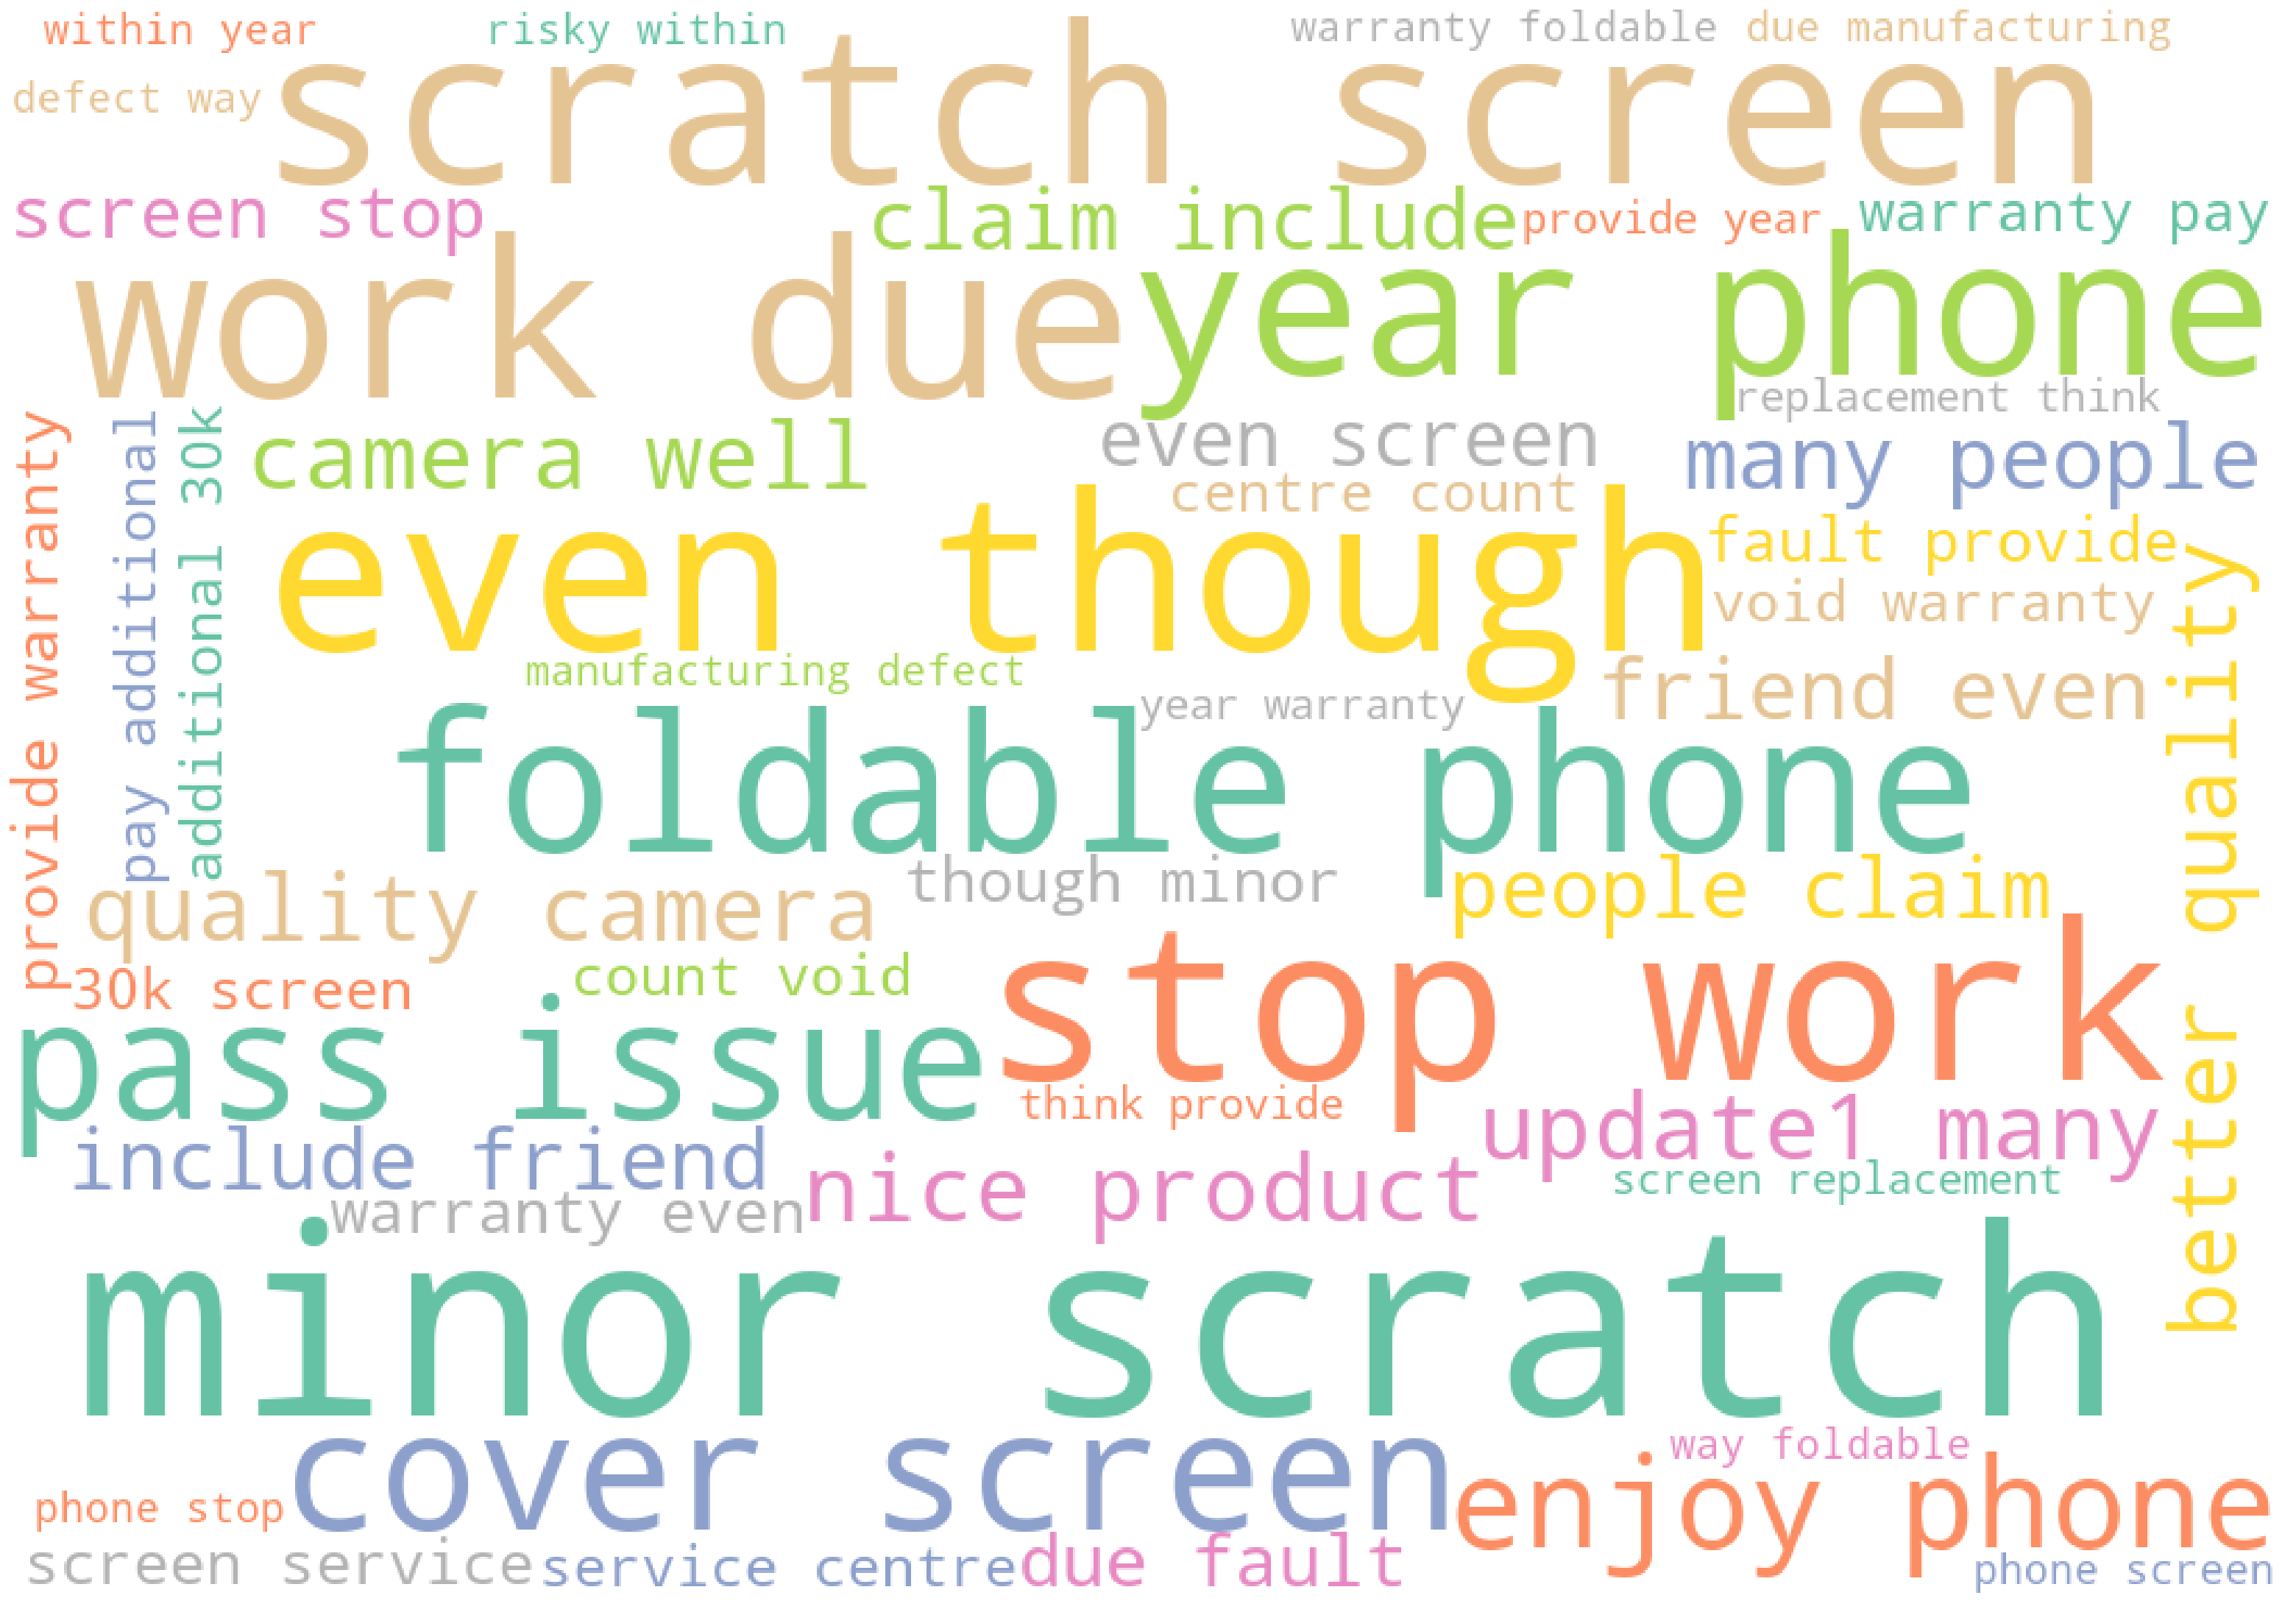

In [75]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis('off')


# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud = WordCloud(width=1000,
                      height=700,
                      background_color='white',
                      max_words=50,
                      colormap='Set2',
                      stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

### Named Entity Recognition (NER)

In [76]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [77]:
for token in doc_block[100:200]:
    print(token,token.pos_) 

well INTJ
iphone PROPN
flauntupdate10 NOUN
day NOUN
pass VERB
issue NOUN
happy ADJ
phone NOUN
provide VERB
atleast NOUN
free ADJ
case NOUN
phone NOUN
going NOUN
buy VERB
apple NOUN
use NOUN
5 NUM
year NOUN
phone NOUN
but CCONJ
fall NOUN
love NOUN
due ADJ
flip VERB
also ADV
apple VERB
useful ADJ
edit NOUN
video NOUN
download NOUN
extensive ADJ
app NOUN
get VERB
mode NOUN
version NOUN
customisation NOUN
android NOUN
perfect ADJ
this DET
phone NOUN
need NOUN
charge NOUN
twice ADJ
day NOUN
set VERB
phone NOUN
charging NOUN
capicuty NOUN
85 NUM
percentage NOUN
normal ADJ
use NOUN
last ADJ
full ADJ
12 NUM
hr NOUN
issue NOUN
display VERB
awesome ADJ
camera NOUN
awesome ADV
like ADP
its PRON
front ADJ
camera NOUN
quality NOUN
must AUX
let VERB
see VERB
happen VERB
middle ADJ
crease NOUN
open VERB
close ADJ
approx NOUN
50 NUM
time NOUN
dayupdate VERB
3 NUM
monthsno NOUN
issue NOUN
screen NOUN
fold ADJ
crease NOUN
nothing PRON
change VERB
slightly ADV
minor ADJ
scratch NOUN
screen NOUN
occur VER

In [78]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['day', 'set', 'phone', 'charging', 'capicuty', 'percentage', 'use', 'hr', 'issue', 'display', 'camera', 'camera', 'quality', 'let', 'see', 'happen', 'crease', 'open', 'approx', 'time', 'dayupdate', 'monthsno', 'issue', 'screen', 'crease', 'change', 'scratch', 'screen', 'occur', 'phone', 'screen', 'time', 'hour', 'time', 'fold', 'enjoy', 'phone', 'way', 'photo', 'take', 'phone', 'wife', 'give', 'update', 'monthsupdate', 'monthscrease', 'issue', 'enjoy', 'phone', 'scratch', 'layer', 'display', 'experience', 'value', 'goodcamera', 'compare', 'iphone', 'promaxesim', 'support', 'esim', 'give', 'battery', 'dust', 'proof', 'issue', 'seem', 'think', 'device', 'target', 'female', 'get', 'wife', 'add', 'accessory', 'camera', 'price', 'phone', 'seem', 'come', 'load', 'feature', 'use', 'day', 'everyday', 'find', 'feature', 'get', 'cone', 'charger', 'cover', 'nice', 'durability', 'performance', 'device', 'user', 'kind', 'use', 'leave', 'battery', 'end']


In [79]:
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

word  count
0     phone   2160
1    screen   1080
2     issue    720
3       use    600
4    camera    480
5   provide    480
6     cover    480
7       day    480
8  warranty    360
9   scratch    360

<AxesSubplot: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

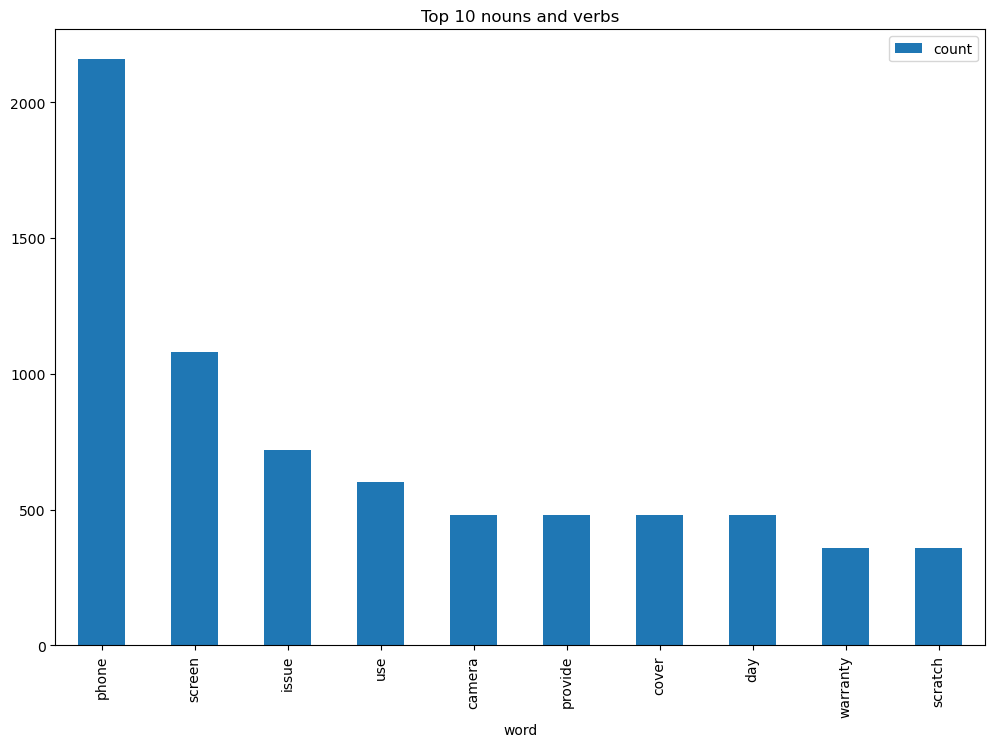

In [80]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

### Emotion Mining - Sentiment Analysis

In [81]:
sentences=nltk.tokenize.sent_tokenize(' '.join(reviews))
sentences

['Nice product could have been better if quality of camera was better Update1.',
 'Many  people has claimed including my friend that even if screen stop working due to Samsung fault, they will not provide warranty even though minor scratches on screen Samsung service centre count as void of warranty and you have to pay additional 30k for screen replacement.',
 'I think Samsung should provide 2 year warranty on foldable phone screen otherwise it is very risky within 1 year if phone stop working due to manufacturing defect or the way foldable phone design you will have to bear the cost even though you have paid 1 lakh rupees.',
 "Keep in mind  by the way 1 month passed i have no any issues but people say problem occurred after 6 months.Initial reviewI'm thrilled with experience especially the cover display.",
 'Download cover screen os app and enjoy YouTube, chrome and more on cover screen which samsung by default not provide.',
 'Phone is better than iPhone to flaunt.Update10 days passe

In [82]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0     Nice product could have been better if quality...
1     Many  people has claimed including my friend t...
2     I think Samsung should provide 2 year warranty...
3     Keep in mind  by the way 1 month passed i have...
4     Download cover screen os app and enjoy YouTube...
...                                                 ...
4316  The durability and performance of the device i...
4317  How amazing is that and must say the phone loo...
4318                                   Excellent phone.
4319  Worth for money Loved this phone , it's been 1...
4320                       Awesome product from samsung

[4321 rows x 1 columns]

In [83]:
# Emotion Lexicon - Affin
# Source of this dataset
# https://github.com/rudeboybert/fivethirtyeight/blob/master/inst/extdata/afinn.csv

affin = pd.read_csv(r"D:\Assignment\Text Mining\afinn.csv")
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [84]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [85]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores


def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [86]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       3
1      -2
2      -5
3      -3
4       2
       ..
4316    5
4317    5
4318    3
4319    7
4320    4
Name: sentiment_value, Length: 4321, dtype: int64

In [87]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       13
1       46
2       49
3       30
4       20
        ..
4316    34
4317    20
4318     2
4319    19
4320     4
Name: word_count, Length: 4321, dtype: int64

In [88]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
1478  I think Samsung should provide 2 year warranty...               -5   
748   I think Samsung should provide 2 year warranty...               -5   
4106  I think Samsung should provide 2 year warranty...               -5   
3016  I think Samsung should provide 2 year warranty...               -5   
1910  I think Samsung should provide 2 year warranty...               -5   
...                                                 ...              ...   
243   Awesome product from samsung What I think the ...               17   
2907  Awesome product from samsung What I think the ...               17   
2187  Awesome product from samsung What I think the ...               17   
2178  Awesome product from samsung What I think the ...               17   
3411  Awesome product from samsung What I think the ...               17   

      word_count  
1478          49  
748           49  
4106          49  
3016          49  
1910          49  
...          ...  
243           45  
2907          45  
2187          45  
2178          45  
3411          45  

[4321 rows x 3 columns]

In [89]:
sent_df['sentiment_value'].describe()

count    4321.000000
mean        2.053691
std         3.341848
min        -5.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        17.000000
Name: sentiment_value, dtype: float64

In [90]:
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
1     Many  people has claimed including my friend t...               -2   
2     I think Samsung should provide 2 year warranty...               -5   
3     Keep in mind  by the way 1 month passed i have...               -3   
7     I was going to buy apple after using 5 year Sa...                0   
10           This phone need to be charged twice a day.                0   
...                                                 ...              ...   
4304  By the way photo was taken with this phone and...                0   
4305  Will give you next update after 6 months.Updat...                0   
4307      Slight and minor scratch on protective layer.                0   
4308                But reiterate display has as it is.                0   
4313                     It comes loaded with features.                0   

      word_count  
1             46  
2             49  
3             30  
7             12  
10             9  
...          ...  
4304          14  
4305          17  
4307           7  
4308           7  
4313           5  

[1805 rows x 3 columns]

In [91]:
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
0     Nice product could have been better if quality...                3   
4     Download cover screen os app and enjoy YouTube...                2   
5     Phone is better than iPhone to flaunt.Update10...                2   
6     Samsung should provide atleast free case with ...                1   
8     But again i fall in love with Samsung due to f...                3   
...                                                 ...              ...   
4316  The durability and performance of the device i...                5   
4317  How amazing is that and must say the phone loo...                5   
4318                                   Excellent phone.                3   
4319  Worth for money Loved this phone , it's been 1...                7   
4320                       Awesome product from samsung                4   

      word_count  
0             13  
4             20  
5             14  
6              9  
8             11  
...          ...  
4316          34  
4317          20  
4318           2  
4319          19  
4320           4  

[2516 rows x 3 columns]

In [92]:
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0     Nice product could have been better if quality...                3   
1     Many  people has claimed including my friend t...               -2   
2     I think Samsung should provide 2 year warranty...               -5   
3     Keep in mind  by the way 1 month passed i have...               -3   
4     Download cover screen os app and enjoy YouTube...                2   
...                                                 ...              ...   
4316  The durability and performance of the device i...                5   
4317  How amazing is that and must say the phone loo...                5   
4318                                   Excellent phone.                3   
4319  Worth for money Loved this phone , it's been 1...                7   
4320                       Awesome product from samsung                4   

      word_count  index  
0             13      0  
1             46      1  
2             49      2  
3             30      3  
4             20      4  
...          ...    ...  
4316          34   4316  
4317          20   4317  
4318           2   4318  
4319          19   4319  
4320           4   4320  

[4321 rows x 4 columns]

<AxesSubplot: xlabel='sentiment_value', ylabel='Density'>

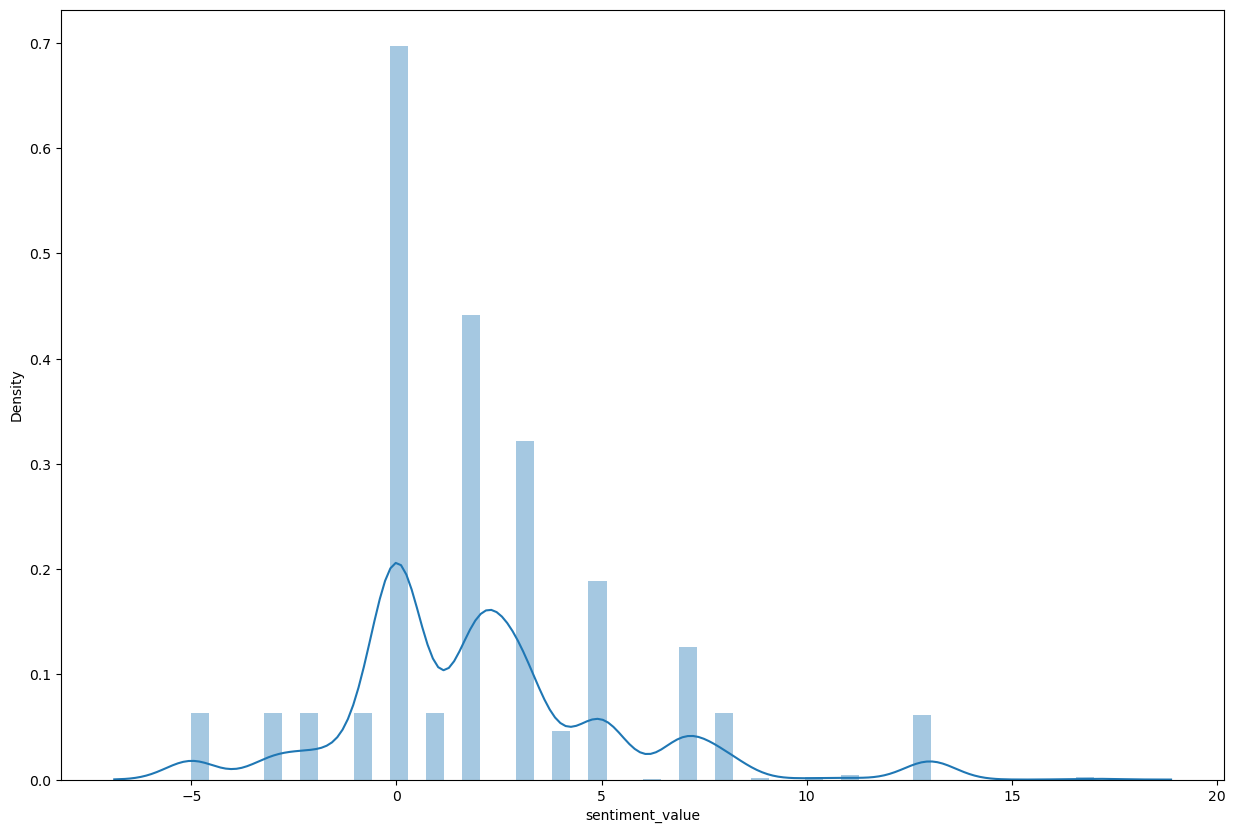

In [93]:
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot: xlabel='index', ylabel='sentiment_value'>

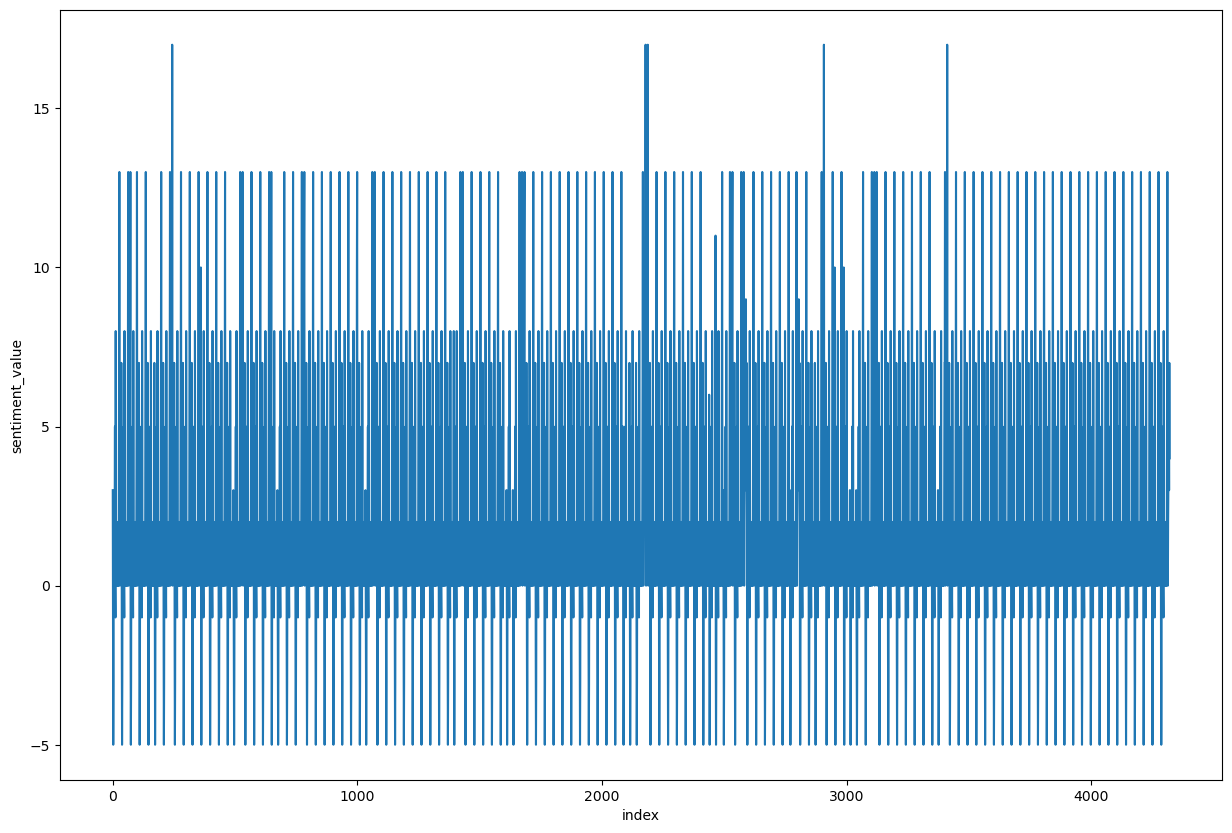

In [94]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

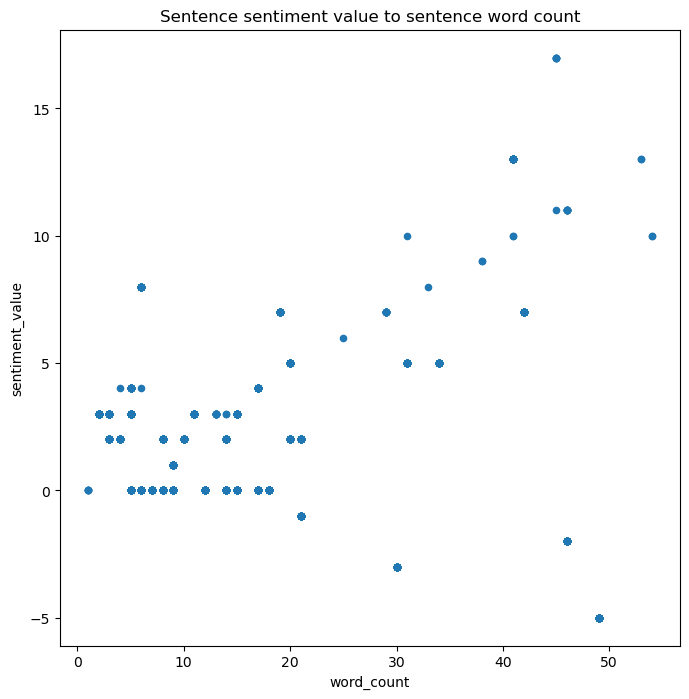

In [95]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')